# QR-разложение матриц: три подхода  
### Метод Грама–Шмидта, преобразования Хаусхолдера и матрицы Гивенса  

**Автор:** Докучаев Алексей \
**Курс:** ИПС \
**Преподаватель:**  Широков Дмитрий Сергеевич \
**Дата:** 01.12.2025

## Определение QR-разложения (комплексный случай)

Пусть $ A \in \mathbb{C}^{m \times n} $ — комплексная матрица, где $ m \geq n $ и столбцы матрицы $ A $ линейно независимы (т.е. $ \operatorname{rank}(A) = n $). Тогда существует единственное **QR-разложение** матрицы $ A $, то есть её представление в виде:

$$
A = QR,
$$

где:

- $ Q \in \mathbb{C}^{m \times n} $ — **унитарная по столбцам** матрица: $ Q^* Q = I_n $, где $ Q^* $ обозначает **эрмитово сопряжение** (сопряжённо-транспонированную матрицу),
- $ R \in \mathbb{C}^{n \times n} $ — **верхнетреугольная** матрица с **положительными вещественными диагональными элементами**: $ r_{ii} \in \mathbb{R},\ r_{ii} > 0 $ для всех $ i = 1, \dots, n $.

> **Замечание.** В случае $ m = n $ матрица $ Q \in \mathbb{C}^{n \times n} $ является **унитарной**, то есть $ Q^* Q = Q Q^* = I_n $.

Это определение включает вещественный случай как частный: при $ A \in \mathbb{R}^{m \times n} $ эрмитово сопряжение совпадает с транспонированием, а унитарность переходит в ортогональность.

Окей, в прошлой ячейке я определил $QR$ - разложение для матрицы $A$ в случае, когда $A$ имеет полный столбцовый ранг, а можно ли определить $QR$ - разложение для матрицы $A$ при неполном ранге?  
Ответ: Да!

Пусть $ A \in \mathbb{C}^{m \times n} $, где $ m \geq n $, но $ \operatorname{rank}(A) = r < n $. Тогда существует QR-разложение вида:

$$
A = QR,
$$

где:
- $ Q \in \mathbb{C}^{m \times n} $ удовлетворяет $ Q^* Q = I_n $,
- $ R \in \mathbb{C}^{n \times n} $ — верхнетреугольная матрица, у которой
  $$
  r_{ij} = 0 \quad \text{для всех } i > r \text{ и } j = 1,...,n.
  $$

В этом случае разложение **существует, но не единственно**: выбор ортонормированного базиса ортогонального дополнения к столбцовому пространству $\mathcal{R}(A)$ не единственный. Единственность может быть восстановлена, например, с помощью QR-разложения с выбором ведущего столбца (rank-revealing QR).

Как строится $ Q $ в этом случае?

Чтобы завершить построение $ Q \in \mathbb{C}^{m \times n} $ с ортонормированными столбцами, необходимо **дополнить** систему $ \{q_1, \dots, q_r\} $ до полного ортонормированного набора из $ n $ векторов в $ \mathbb{C}^m $. Это дополнение выбирается в **ортогональном дополнении** к столбцовому пространству:
$$
\mathcal{R}(A)^\perp \subset \mathbb{C}^m.
$$

Поскольку это подпространство имеет размерность $ m - r \geq n - r $, такое дополнение возможно. Однако **базис в $ \mathcal{R}(A)^\perp $ не единственный**, поэтому столбцы $ q_{r+1}, \dots, q_n $ могут быть выбраны неоднозначно.

Так как эти столбцы умножаются на **нулевые строки** матрицы $ R $, они **не влияют на произведение $ QR $**, и, следовательно, **QR-разложение не единственно**.

---

А как можно добиться улучшения стабильности метода, если разложение не единственно? \
Решение: \
Метод **QR-разложения с выбором ведущего столбца** (column pivoting) строит разложение вида:

$$
A P = Q R,
$$

где:
- $ P \in \mathbb{R}^{n \times n} $ — матрица перестановки столбцов,
- $ Q \in \mathbb{C}^{m \times n} $, $ Q^* Q = I_n $,
- $ R \in \mathbb{C}^{n \times n} $ — верхнетреугольная, с дополнительным свойством:
  $$
  |r_{11}| \geq |r_{22}| \geq \dots \geq |r_{nn}|.
  $$

Благодаря перестановке, линейно независимые столбцы $ A $ перемещаются в начало. В результате матрица $ R $ принимает блочную форму:

$$
R = \begin{bmatrix}
R_{11} & R_{12} \\
0 & 0
\end{bmatrix}, \quad R_{11} \in \mathbb{C}^{r \times r} \text{ — невырожденная}.
$$

Теперь первые $ r $ столбцов $ Q $ однозначно определяются (при условии $ r_{ii} > 0 $). Хотя последние $ n - r $ столбцов $ Q $ по-прежнему неоднозначны, **их неоднозначность отделена**, и численно такая форма используется для устойчивого определения ранга и решения задач наименьших квадратов при вырождении.


Мы рассмотрели 2 определения, где $ A \in \mathbb{C}^{m \times n} $ и $ m \geq n $, а можно ли рассматривать QR разложение для случая $m < n$? \
Ответ: Тоже да!

Случай $ m < n $: сведение к прошлым определениям

Пусть $ A \in \mathbb{C}^{m \times n} $, $ m < n $. Рассмотрим $ A^* \in \mathbb{C}^{n \times m} $ (теперь $ n \geq m $). По Определению 1 (или 2) существует QR-разложение:
$$
A^* = \widetilde{Q} \widetilde{R}, \quad \widetilde{Q} \in \mathbb{C}^{n \times m},\ \widetilde{R} \in \mathbb{C}^{m \times m}.
$$
Сопрягая, получаем:
$$
A = \widetilde{R}^* \widetilde{Q}^*,
$$
что является **LQ-разложением** матрицы $ A $. Чтобы получить именно **QR-разложение**, используется полная форма $ A = Q R $ с $ Q \in \mathbb{C}^{m \times m} $, $ R \in \mathbb{C}^{m \times n} $, которая всегда существует (такой доказательство я рассказывал в прошлый раз)

## Метод Грама–Шмидта (модифицированный)



Метод Грама–Шмидта — классический алгоритм ортогонализации системы векторов. Он позволяет построить QR-разложение матрицы $ A \in \mathbb{C}^{m \times n} $ (при $ m \geq n $ и $ \operatorname{rank}(A) = n $) путём последовательной ортогонализации её столбцов.

Различают **классический** (CGS) и **модифицированный** (MGS) варианты. Несмотря на эквивалентность в точной арифметике, **MGS значительно устойчивее к ошибкам округления** и поэтому предпочтителен в численных вычислениях.

---

### Алгоритм (модифицированный метод Грама–Шмидта)

Пусть $ A = \begin{bmatrix} a_1 & a_2 & \cdots & a_n \end{bmatrix} $, где $ a_j \in \mathbb{C}^m $.

Инициализируем:  
Для $ j = 1, \dots, n $ положим $ v_j = a_j $.

Для $ i = 1 $ до $ n $:
1. Вычислим норму: $ r_{ii} = \|v_i\|_2 $.
2. Если $ r_{ii} = 0 $, то столбцы $ A $ линейно зависимы; алгоритм может быть остановлен или продолжен с искусственно выбранным $ q_i $ (в практических реализациях часто используется pivoting).
3. Нормируем: $ q_i = v_i / r_{ii} $.
4. Для всех $ j = i+1, \dots, n $:
   - Вычислим коэффициент: $ r_{ij} = q_i^* v_j $,
   - Обновим вектор: $ v_j = v_j - r_{ij} q_i $.

В результате:
- $ Q = \begin{bmatrix} q_1 & \cdots & q_n \end{bmatrix} \in \mathbb{C}^{m \times n} $, $ Q^* Q = I_n $,
- $ R = (r_{ij}) \in \mathbb{C}^{n \times n} $ — верхнетреугольная,
- $ A = QR $.

---

### Замечания

- При $ \operatorname{rank}(A) = r < n $ на шаге $ i = r+1 $ возникает $ r_{ii} = 0 $. В этом случае MGS не может продолжить без дополнительных мер.
- Для повышения устойчивости при вырождении рекомендуется использовать **QR с выбором ведущего столбца**, сочетающий MGS с перестановкой.
- Сложность алгоритма: $ \mathcal{O}(m n^2) $ операций.

Ну ладно, теория конечно круто, здорово, интересно, но хочется посмотреть как это реализовать на питоне. \
А вот так!

In [24]:
import numpy as np
def qr_gram_schmidt(A, tol=1e-10):
    A = np.asarray(A, dtype=float)
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    V = A.copy()
    rank = 0
    for j in range(n):
        for i in range(rank):
            R[i, j] = np.dot(Q[:, i], V[:, j])
            V[:, j] -= R[i, j] * Q[:, i]
        norm = np.linalg.norm(V[:, j])
        if norm > tol:
            Q[:, rank] = V[:, j] / norm
            R[rank, j] = norm
            rank += 1
    Q = Q[:, :rank]
    R = R[:rank, :]
    return Q, R, rank

In [25]:
print(" " * 25 + "ТЕСТ 1 — МАТРИЦА ПОЛНОГО РАНГА")
A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9],
               [10, 11, 13]], dtype=float)

Q1, R1, rank1 = qr_gram_schmidt(A1)
print("матрица A =")
print(A1)
print(f"\nранг матрицы A = {rank1}")
print("\nматрица Q =")
print(np.round(Q1, 8))
print("\nматрица R =")
print(np.round(R1, 8))
print("\nQR =")
print(np.round(Q1 @ R1, 8))

print(" " * 25 + "ТЕСТ 2 — МАТРИЦА НЕПОЛНОГО РАНГА \n")
A2 = np.array([[1,  2,  3,  6],
               [2,  4,  6, 12],
               [3,  6,  9, 18],
               [4,  8, 12, 24]], dtype=float)

Q2, R2, rank2 = qr_gram_schmidt(A2)
print("матрица A =")
print(A2)
print(f"\nранг матрицы A = {rank2}")
print("\nматрица Q =")
print(np.round(Q2, 8))
print("\nматрица R =")
print(np.round(R2, 8))
print("\nQR =")
print(np.round(Q2 @ R2, 8))

                         ТЕСТ 1 — МАТРИЦА ПОЛНОГО РАНГА
матрица A =
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 13.]]

ранг матрицы A = 3

матрица Q =
[[ 0.07761505  0.83305216  0.36514837]
 [ 0.31046021  0.45123659 -0.18257419]
 [ 0.54330537  0.06942101 -0.73029674]
 [ 0.77615053 -0.31239456  0.54772256]]

матрица R =
[[12.88409873 14.59162988 17.07531157]
 [ 0.          1.0413152   1.77023584]
 [ 0.          0.          0.54772256]]

QR =
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 13.]]
                         ТЕСТ 2 — МАТРИЦА НЕПОЛНОГО РАНГА 

матрица A =
[[ 1.  2.  3.  6.]
 [ 2.  4.  6. 12.]
 [ 3.  6.  9. 18.]
 [ 4.  8. 12. 24.]]

ранг матрицы A = 1

матрица Q =
[[0.18257419]
 [0.36514837]
 [0.54772256]
 [0.73029674]]

матрица R =
[[ 5.47722558 10.95445115 16.43167673 32.86335345]]

QR =
[[ 1.  2.  3.  6.]
 [ 2.  4.  6. 12.]
 [ 3.  6.  9. 18.]
 [ 4.  8. 12. 24.]]


## Метод Хаусхолдера



Метод Хаусхолдера — это алгоритм QR-разложения, основанный на **последовательном применении ортогональных (унитарных) преобразований отражения**. В отличие от метода Грама–Шмидта, он **числительно устойчив** и **гарантирует высокую точность** как разложения $ A = QR $, так и ортонормированности $ Q $.

---

### Преобразование Хаусхолдера

Для любого ненулевого вектора $ x \in \mathbb{C}^m $ можно построить **матрицу отражения** (матрицу Хаусхолдера):

$$
H = I - 2 \frac{v v^*}{v^* v},
$$

где $ v = x \pm \|x\|_2 e_1 $ — вектор отражения, а $ e_1 = [1, 0, \dots, 0]^T $.

Матрица $ H $ обладает свойствами:
- **Эрмитова**: $ H^* = H $,
- **Унитарна**: $ H^* H = I $,
- **Отражает** вектор $ x $ вдоль гиперплоскости, ортогональной $ v $

Таким образом, **одно отражение может занулить все компоненты вектора, кроме первой**.

---

### Алгоритм QR-разложения методом Хаусхолдера

Пусть $ A \in \mathbb{C}^{m \times n} $, $ m \geq n $.

Цель: найти унитарную $ Q \in \mathbb{C}^{m \times m} $ и верхнетреугольную $ R \in \mathbb{C}^{m \times n} $, такие что $ A = Q R $.

**Идея**: последовательно занулять поддиагональные элементы по столбцам, применяя отражения слева.

**Шаги**:

Инициализируем $ A^{(0)} := A $.

Для $ k = 1, 2, \dots, n $:

1. Берём текущий подвектор  
   $$
   x = A[k:m, k] \in \mathbb{C}^{m-k+1}
   $$

2. Строим отражение Хаусхолдера $ H_k' = I_{p} - \beta v v^H $ (где $ p = m-k+1 $),  
   такое что  
   $$
   H_k' x = \alpha e_1, \quad |\alpha| = \|x\|_2
   $$  
   (выбираем знак $ \alpha $, чтобы избежать уничтожения информации — обычно $ \alpha = -\operatorname{sign}(x_1) \|x\|_2 $ в вещественном случае).

   Вектор $ v $ имеет вид  
   $$
   v = x + \alpha e_1, \quad \beta = \frac{1}{v^H v} \quad (\beta = \frac{2}{v^H v} \text{ в вещественном случае})
   $$

3. Расширяем отражение до полной размерности:
   $$
   H_k =
   \begin{bmatrix}
   I_{k-1} & 0 \\
   0 & H_k'
   \end{bmatrix}
   \in \mathbb{C}^{m \times m}
   $$

4. Применяем $ H_k $ **только к текущей подматрице** (это ключевое отличие от наивной записи):
   $$
   A[k:m, k:n] \leftarrow H_k' \, A[k:m, k:n]
   $$
   (при этом поддиагональные элементы в $ k $-м столбце обнуляются, а правые столбцы обновляются корректно).

5. Сохраняем информацию о отражении (обычно вектор $ v $ записывают под диагональ в $ A[k+1:m, k] $, а $ \beta $ или $ v_1 = 1 $ — по договорённости).

После $ n $ шагов:

- Матрица $ A $ содержит:
  - верхнетреугольную часть $ R $ (включая диагональ и выше),
  - под диагональю — векторы $ v $ отражений (или их существенная часть).
- Полная унитарная матрица $ Q $ восстанавливается как произведение:
  $$
  Q = H_1 H_2 \cdots H_n
  $$
  (на практике её накапливают отдельно или восстанавливают по сохранённым $ v $ и $ \beta $).
---

### Преимущества метода Хаусхолдера

- **Численная устойчивость**: ошибки округления не накапливаются.
- **Высокая точность**: $ \|A - QR\| $ и $ \|Q^* Q - I\| $ находятся на уровне машинной точности.
- **Работает при любом ранге**: нулевые диагональные элементы $ R $ корректно указывают на вырождение.
- **Не требует явной перестановки** (хотя pivoting можно добавить для rank-revealing).

> **Сложность**: $ \mathcal{O}(m n^2) $ операций — такая же, как у Грама–Шмидта, но с лучшей константой и устойчивостью.

А вот и пример реализации:

In [38]:
import numpy as np
def qr_householder(A_in):
    A = A_in.copy().astype(float)
    m, n = A.shape
    V = []
    for k in range(n):
        x = A[k:, k]
        norm_x = np.linalg.norm(x)
        if norm_x < 1e-14:
            V.append((None, k))
            continue
        v = x.copy()
        sign = np.sign(v[0]) if v[0] != 0 else 1.0
        v[0] += sign * norm_x
        v = v / np.linalg.norm(v)
        V.append((v, k))
        A[k:, k:] -= 2.0 * np.outer(v, v @ A[k:, k:])
    Q = np.eye(m)
    for v, k in reversed(V):
        if v is None:
            continue
        Q[k:, :] -= 2.0 * np.outer(v, v @ Q[k:, :])
    R = A.copy()
    return Q, R

In [39]:
def print_test(title, A):
    print("\n" + "="*80)
    print(f" {title} ")
    print("="*80)

    Q, R = qr_householder(A)

    print("матрица A =")
    print(A)
    print("\nматрица Q =")
    print(np.round(Q, 6))
    print("\nматрица R =")
    print(np.round(R, 6))

    recon = Q @ R
    print("\nQR =")
    print(np.round(recon, 6))

A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9],
               [10,11,13]], dtype=float)
print_test("ТЕСТ 1 — ПОЛНЫЙ РАНГ (4×3)", A1)

A2 = np.array([[1, 2, 3],
               [2, 4, 6],
               [3, 6, 9]], dtype=float)
print_test("ТЕСТ 2 — НЕПОЛНЫЙ РАНГ (3×3, ранг=1)", A2)


 ТЕСТ 1 — ПОЛНЫЙ РАНГ (4×3) 
матрица A =
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 13.]]

матрица Q =
[[-0.077615 -0.833052  0.365148 -0.408248]
 [-0.31046  -0.451237 -0.182574  0.816497]
 [-0.543305 -0.069421 -0.730297 -0.408248]
 [-0.776151  0.312395  0.547723  0.      ]]

матрица R =
[[-12.884099 -14.59163  -17.075312]
 [  0.        -1.041315  -1.770236]
 [  0.         0.         0.547723]
 [  0.         0.         0.      ]]

QR =
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 13.]]

 ТЕСТ 2 — НЕПОЛНЫЙ РАНГ (3×3, ранг=1) 
матрица A =
[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]

матрица Q =
[[-0.267261 -0.534522 -0.801784]
 [-0.534522  0.774542 -0.338187]
 [-0.801784 -0.338187  0.492719]]

матрица R =
[[ -3.741657  -7.483315 -11.224972]
 [ -0.        -0.        -0.      ]
 [ -0.        -0.         0.      ]]

QR =
[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]


## Матрицы Гивенса



Матрица Гивенса — это **ортогональная матрица вращения**, которая действует нетривиально только в **двумерной координатной плоскости** $ (i, j) $ и оставляет остальные компоненты вектора неизменными. Она используется для **последовательного зануления отдельных поддиагональных элементов** матрицы.

---

### Определение

Для индексов $ 1 \leq i < j \leq m $ и угла $ \theta \in \mathbb{R} $, **матрица Гивенса** $ G(i, j, \theta) \in \mathbb{R}^{m \times m} $ определяется как:

- $ G_{kk} = 1 $ для всех $ k \ne i, j $,
- $ G_{ii} = G_{jj} = \cos \theta $,
- $ G_{ij} = -\sin \theta $,
- $ G_{ji} = \sin \theta $,
- Все остальные элементы — нулевые.

Эквивалентно, $ G $ совпадает с единичной матрицей, за исключением подматрицы на пересечении строк и столбцов $ i, j $:

$$
G(i, j, \theta) =
\left[ \begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{array} \right]
\quad \text{в позициях } (i,j).
$$

Матрица $ G $ ортогональна: $ G^T G = I $.

---

### Зануление элемента с помощью вращения

Пусть дан вектор $ \begin{bmatrix} a \\ b \end{bmatrix} \in \mathbb{R}^2 $. Выберем $ c = \cos \theta $, $ s = \sin \theta $ так, чтобы:

$$
\begin{bmatrix}
c & -s \\
s & c
\end{bmatrix}
\begin{bmatrix}
a \\ b
\end{bmatrix}
=
\begin{bmatrix}
r \\ 0
\end{bmatrix},
\quad r = \sqrt{a^2 + b^2}.
$$

Тогда:
- Если $ r = 0 $, полагаем $ c = 1, s = 0 $,
- Иначе:
  $$
  c = \frac{a}{r}, \quad s = \frac{b}{r}.
  $$

На практике, чтобы избежать переполнения, используют стабильную формулу:
$$
\text{если } |a| > |b|, \quad t = b/a, \quad c = 1/\sqrt{1 + t^2}, \quad s = c t,
$$
и наоборот.

---

### Алгоритм QR-разложения с помощью матриц Гивенса

Цель: привести матрицу $ A \in \mathbb{R}^{m \times n} $ ($ m \geq n $) к верхнетреугольному виду $ R $, применяя последовательность вращений $ G_1, G_2, \dots, G_p $:

$$
G_p \cdots G_2 G_1 A = R \quad \Rightarrow \quad A = Q R, \quad Q = G_1^T G_2^T \cdots G_p^T.
$$

**Порядок зануления** (для $ m = 4, n = 3 $):

1. Занулить $ a_{21} $ с помощью $ G(1,2) $,
2. Занулить $ a_{31} $ с помощью $ G(1,3) $,
3. Занулить $ a_{41} $ с помощью $ G(1,4) $,
4. Занулить $ a_{32} $ с помощью $ G(2,3) $,
5. Занулить $ a_{42} $ с помощью $ G(2,4) $,
6. Занулить $ a_{43} $ с помощью $ G(3,4) $.

Каждое вращение **затрагивает только две строки матрицы**, что делает метод **локальным и параллелизуемым**.

---

### Преимущества метода Гивенса

- **Точечное воздействие**: идеален для разреженных матриц.
- **Легко распараллеливается**: независимые вращения можно применять одновременно.
- **Устойчив**: как и Хаусхолдер, обеспечивает высокую точность.
- **Гибкость**: можно занулить любой элемент, а не только столбец целиком.

> **Сложность**: $ \mathcal{O}(m n^2) $, как у других методов, но с бо́льшей константой из-за большего числа операций.

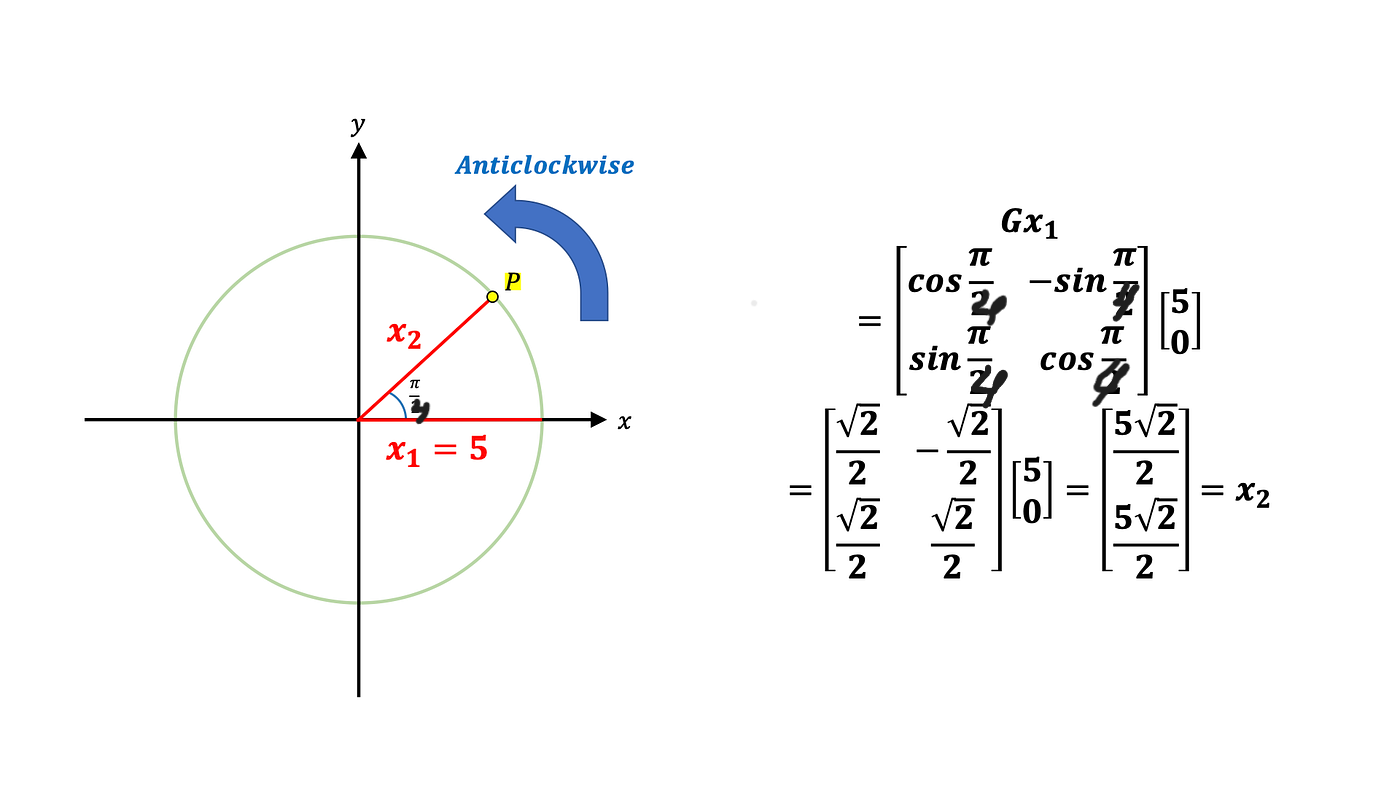

Ну и пример реализации конечно же:

In [42]:
import numpy as np
def qr_givens(A_in, tol=1e-12):
    A = A_in.copy().astype(float)
    m, n = A.shape
    Q = np.eye(m)
    for k in range(n):
        for i in range(m-1, k, -1):
            if abs(A[i, k]) < tol:
                continue
            a = A[k, k]
            b = A[i, k]
            r = np.sqrt(a**2 + b**2)
            if r < tol:
                continue
            c = a / r
            s = b / r
            G = np.array([[c, s], [-s, c]])
            rows = np.array([k, i])
            A[rows, k:] = G @ A[rows, k:]
            Q[:, rows] = Q[:, rows] @ G.T
    R = np.triu(A[:n, :])
    Q = Q[:, :n]
    return Q, R

def print_test(title, A):
    print("\n" + "="*80)
    print(f" {title} ")
    print("="*80)
    Q, R = qr_givens(A)
    print("матрица A =")
    print(A)
    print("\nматрица Q =")
    print(np.round(Q, 8))
    print("\nматрица R =")
    print(np.round(R, 8))
    print("\nQR =")
    print(np.round(Q @ R, 8))


A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9],
               [10,11,13]], dtype=float)

print_test("ТЕСТ 1 — МАТРИЦА ПОЛНОГО РАНГА (4×3)", A1)

A2 = np.array([[1, 2, 3, 6],
               [2, 4, 6, 12],
               [3, 6, 9, 18],
               [4, 8, 12, 24]], dtype=float)

print_test("ТЕСТ 2 — МАТРИЦА НЕПОЛНОГО РАНГА (ранг = 1)", A2)


 ТЕСТ 1 — МАТРИЦА ПОЛНОГО РАНГА (4×3) 
матрица A =
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 13.]]

матрица Q =
[[ 0.07761505  0.83305216  0.36514837]
 [ 0.31046021  0.45123659 -0.18257419]
 [ 0.54330537  0.06942101 -0.73029674]
 [ 0.77615053 -0.31239456  0.54772256]]

матрица R =
[[12.88409873 14.59162988 17.07531157]
 [ 0.          1.0413152   1.77023584]
 [ 0.          0.          0.54772256]]

QR =
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 13.]]

 ТЕСТ 2 — МАТРИЦА НЕПОЛНОГО РАНГА (ранг = 1) 
матрица A =
[[ 1.  2.  3.  6.]
 [ 2.  4.  6. 12.]
 [ 3.  6.  9. 18.]
 [ 4.  8. 12. 24.]]

матрица Q =
[[ 0.18257419 -0.07161149 -0.14269545 -0.9701425 ]
 [ 0.36514837  0.93094934  0.          0.        ]
 [ 0.54772256 -0.21483446  0.80860754  0.        ]
 [ 0.73029674 -0.28644595 -0.57078179  0.24253563]]

матрица R =
[[ 5.47722558 10.95445115 16.43167673 32.86335345]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]